<a href="https://colab.research.google.com/github/ab17254/dissertation/blob/main/load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload config.py with API keys
from google.colab import files
uploaded = files.upload()

Saving config.py to config.py


In [2]:
import os
from config import KaggleKey
os.environ['KAGGLE_USERNAME'] = KaggleKey.kaggle_username
os.environ['KAGGLE_KEY'] = KaggleKey.kaggle_key
!kaggle datasets download -d albrace/twitter-data

 97% 244M/252M [00:02<00:00, 97.9MB/s]
100% 252M/252M [00:02<00:00, 95.3MB/s]


In [6]:
!unzip /content/twitter-data.zip -d /content/data

Archive:  /content/twitter-data.zip
  inflating: /content/data/all_twitter_data.csv  
  inflating: /content/data/political_twitter_data.csv  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [35]:
pol_df = pd.read_csv('/content/data/political_twitter_data.csv')
all_df = pd.read_csv('/content/data/all_twitter_data.csv')

In [36]:
pol_df['tweet_date'] = pol_df['tweet_date'].map(lambda x: str(x)[:-15])
all_df['tweet_date'] = all_df['tweet_date'].map(lambda x: str(x)[:-15])

all_df['tweet_date'] = pd.to_datetime(all_df['tweet_date'])
all_df = all_df[~(all_df['tweet_date'] < '2017-04-18')]

In [44]:
pol_df['tweet_date'] = pd.to_datetime(pol_df['tweet_date'])

In [56]:
len(all_df['user_username'].unique())

391575

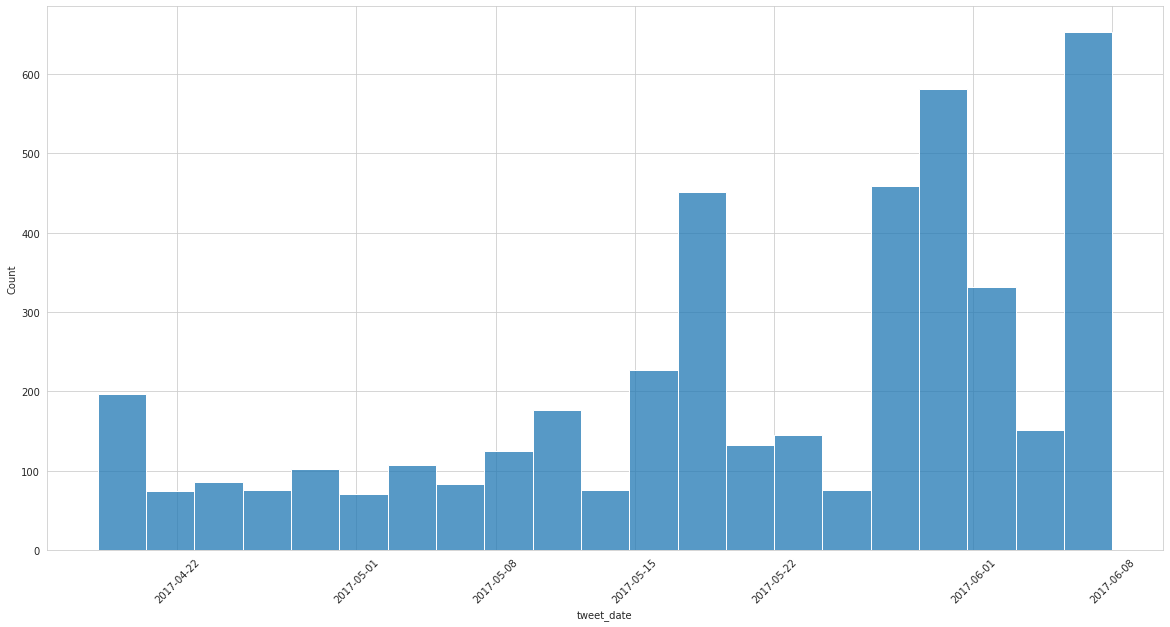

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.histplot(data=pol_df, x='tweet_date')
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

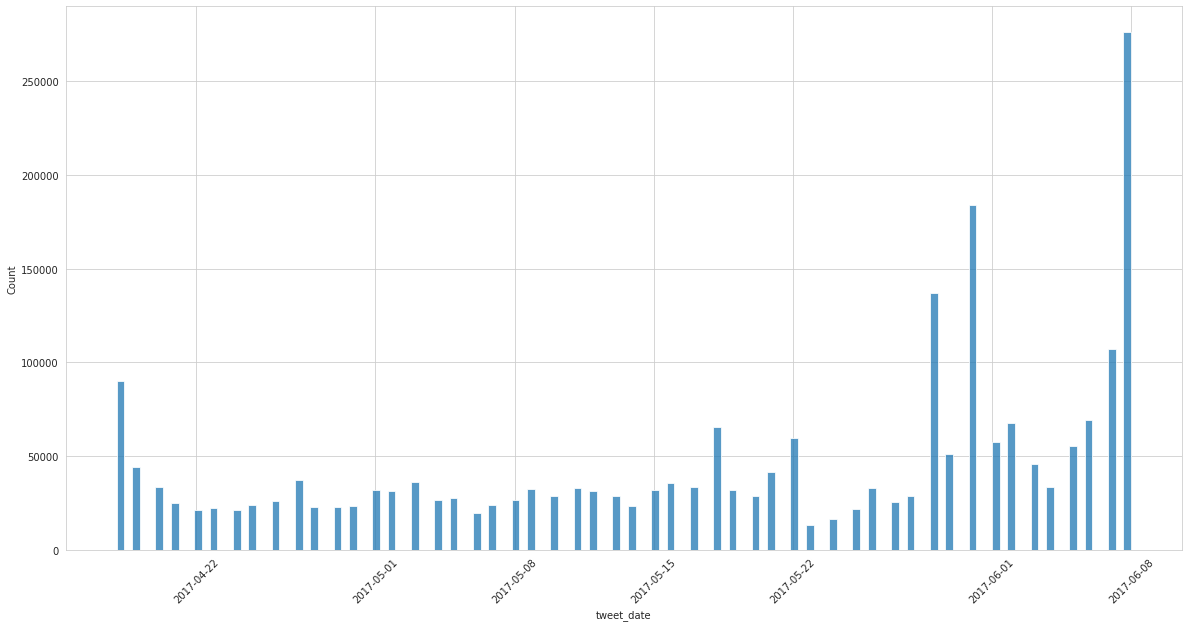

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.histplot(data=all_df, x='tweet_date')
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()